### Data Exploration 

In [2]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords

%matplotlib inline
import os

### Word2vec


In [4]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname),encoding='utf-8'):
                yield line.split()
path = r".\data"
sentences = MySentences(path) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences)

2017-11-18 07:39:33,808 : INFO : collecting all words and their counts
2017-11-18 07:39:33,824 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-18 07:39:34,148 : INFO : PROGRESS: at sentence #10000, processed 602732 words, keeping 42088 word types
2017-11-18 07:39:34,400 : INFO : PROGRESS: at sentence #20000, processed 1226414 words, keeping 66969 word types
2017-11-18 07:39:34,642 : INFO : PROGRESS: at sentence #30000, processed 1826359 words, keeping 87037 word types
2017-11-18 07:39:34,878 : INFO : PROGRESS: at sentence #40000, processed 2437465 words, keeping 105921 word types
2017-11-18 07:39:35,115 : INFO : PROGRESS: at sentence #50000, processed 3045678 words, keeping 123164 word types
2017-11-18 07:39:35,364 : INFO : PROGRESS: at sentence #60000, processed 3644092 words, keeping 139054 word types
2017-11-18 07:39:35,600 : INFO : PROGRESS: at sentence #70000, processed 4249122 words, keeping 154442 word types
2017-11-18 07:39:35,839 : INFO : PRO

##### words similarity

In [5]:
model.similar_by_word('car',topn=20)

2017-11-18 07:40:17,326 : INFO : precomputing L2-norms of word weight vectors


[('car,', 0.8604972958564758),
 ('car.', 0.7899080514907837),
 ('vehicle', 0.7668356895446777),
 ('cars', 0.696347713470459),
 ('taxi', 0.661823034286499),
 ('cab', 0.6418629884719849),
 ('car!', 0.6350436210632324),
 ('luggage', 0.6217143535614014),
 ('valet', 0.6129454970359802),
 ('bags', 0.6078158617019653),
 ('GPS', 0.6036229133605957),
 ('car;', 0.5945501923561096),
 ('ticket', 0.5874740481376648),
 ('van', 0.5796502828598022),
 ('garage', 0.5607550740242004),
 ('shuttle', 0.5576666593551636),
 ('self', 0.550648033618927),
 ('bus', 0.5431119799613953),
 ('cars.', 0.5423146486282349),
 ('vehicle,', 0.5329115390777588)]

In [6]:
model.similar_by_word('happy')

[('pleased', 0.7358478307723999),
 ('satisfied', 0.6941587924957275),
 ('delighted', 0.6824095249176025),
 ('thrilled', 0.6501786708831787),
 ('disappointed', 0.6388288140296936),
 ('Happy', 0.6231675744056702),
 ('impressed', 0.6103938817977905),
 ('successful.', 0.5632472038269043),
 ('excited', 0.5510956048965454),
 ('glad', 0.5375357866287231)]

In [7]:
model.similar_by_word('air')

[('AC', 0.8658554553985596),
 ('A-C', 0.8485249280929565),
 ('heating', 0.8165978193283081),
 ('a-c', 0.8145250082015991),
 ('heater', 0.7864929437637329),
 ('unit', 0.7831959128379822),
 ('temperature', 0.762860894203186),
 ('thermostat', 0.747360110282898),
 ('heat', 0.7463091611862183),
 ('heating-air', 0.7043873071670532)]

In [24]:
model['heat']

array([  6.75244927e-01,   1.69252884e+00,  -1.34279132e+00,
        -2.72852749e-01,   4.58544016e-01,   3.74226749e-01,
        -2.17961535e-01,   3.39037895e-01,  -4.31499213e-01,
         3.06116343e-01,  -1.18176496e+00,   1.48169446e+00,
         6.27144277e-01,   1.07159448e+00,   3.75951678e-01,
         1.49658740e+00,  -2.11421311e-01,   8.27095568e-01,
         1.13788456e-01,  -1.98481843e-01,   5.13112366e-01,
         7.72560120e-01,  -1.09760273e+00,  -1.02342062e-01,
        -6.32154584e-01,   2.86602318e-01,   7.03604996e-01,
         3.46706867e-01,  -1.78326061e-03,   4.85298991e-01,
        -9.69418406e-01,  -8.71953845e-01,   1.00046791e-01,
        -4.19474185e-01,  -3.06704044e-01,  -5.20145036e-02,
        -4.86813098e-01,  -3.99453431e-01,  -2.15260804e-01,
        -1.42943311e+00,   3.32618922e-01,   1.34044075e+00,
         7.87804902e-01,  -2.22009420e-01,   1.43464565e+00,
         2.02022657e-01,   5.55818856e-01,  -1.43742359e+00,
        -8.85276973e-01,

## visualization of 100 dim word2vec

### Create a subset of known class for understanding

In [21]:
targets = ['car','truck','vehicle','van','cab','bike','taxi','keys','ruined','heat',
           'snow','icy','slippery','pavement','rain','wet','construction','rocks','water','ice']
classes = [1,1,1,1,1,1,1,1,1,1,
           2,2,2,2,2,2,2,2,2,2]

In [22]:
X_target=[]
for w in targets:
    X_target.append(model[w])
X_target = np.asarray(X_target)

In [17]:
type(X_target)

numpy.ndarray

### From all list of word from model only select 10,000 for training tSNE model 

In [25]:
word_list = list(model.wv.vocab)[:10000]
X_subset=[]
for w in word_list:
    X_subset.append(model[w])
X_subset = np.asarray(X_subset)

In [26]:
X_target = np.concatenate((X_subset, X_target))
print(X_target.shape)

(10020, 100)


In [27]:
print(X_target)

[[ 1.18846583 -0.78935003  1.88314497 ...,  2.47267342  0.89102232
  -0.24286652]
 [-0.41363776 -2.3831296   3.91091251 ...,  1.2288028   1.1196245
  -1.39930594]
 [-1.92788625 -1.80006635  0.53950316 ..., -3.23850012  0.30841377
   0.63069528]
 ..., 
 [-0.09675864 -0.04544745 -0.07386545 ...,  0.08680413  0.06955484
   0.03209593]
 [-0.8944295   3.34365153 -0.93935853 ...,  0.19071083  2.42297292
   1.39280248]
 [-1.03113985  2.33881545 -2.21320963 ...,  1.15653253  0.65195453
   0.57549423]]


### Run tSNE on sample data

In [29]:
%%time
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=40, init='pca', method='exact',
                  random_state=0, n_iter=250, verbose=2).fit_transform(X_target)
print(X_tsne.shape)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 10020
[t-SNE] Computed conditional probabilities for sample 2000 / 10020
[t-SNE] Computed conditional probabilities for sample 3000 / 10020
[t-SNE] Computed conditional probabilities for sample 4000 / 10020
[t-SNE] Computed conditional probabilities for sample 5000 / 10020
[t-SNE] Computed conditional probabilities for sample 6000 / 10020
[t-SNE] Computed conditional probabilities for sample 7000 / 10020
[t-SNE] Computed conditional probabilities for sample 8000 / 10020
[t-SNE] Computed conditional probabilities for sample 9000 / 10020
[t-SNE] Computed conditional probabilities for sample 10000 / 10020
[t-SNE] Computed conditional probabilities for sample 10020 / 10020
[t-SNE] Mean sigma: 0.282974
[t-SNE] Iteration 50: error = 89.6806958, gradient norm = 0.0229050 (50 iterations in 222.309s)
[t-SNE] Iteration 100: error = 89.8179622, gradient norm = 0.0320810 (50 iterations in 220.370s)

In [30]:
X_tsne_target = X_tsne[-20:,:]
print(X_tsne_target.shape)

(20, 2)


In [31]:
X_tsne[0]

array([ 0.04396219, -0.00273348], dtype=float32)

In [32]:
def plot_words(X, labels, classes=None, xlimits=None, ylimits=None):
    fig = plt.figure(figsize=(10, 10))
    if xlimits is not None:
        plt.xlim(xlimits)
    if ylimits is not None:
        
        plt.ylim(ylimits)
    plt.scatter(X[:, 0], X[:, 1], c=classes)
    for i, txt in enumerate(labels):
        plt.annotate(txt, (X[i, 0], X[i, 1]))

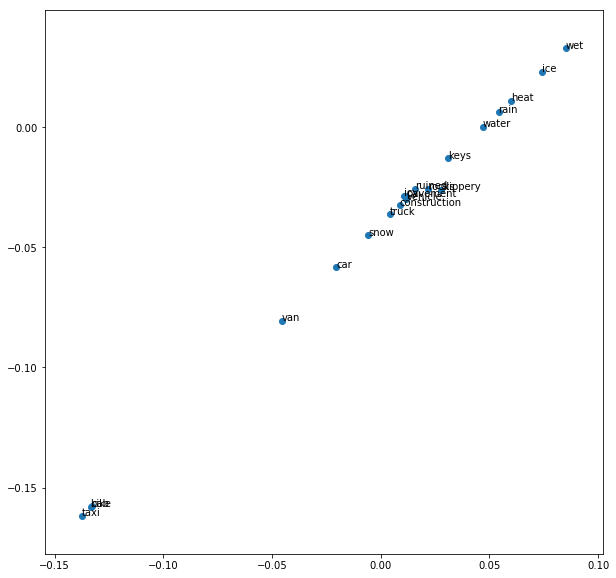

In [33]:
plot_words(X_tsne_target, targets, classes=None)

In [34]:
test_list = [model['Price'],model['Car']]

In [35]:
x_test_list = np.asarray(test_list)
type(x_test_list)

numpy.ndarray

In [36]:
x_test_list[0]

array([-0.32350028,  0.21794589, -0.56272304, -0.20706373, -0.30413049,
        0.61482155,  0.07374875, -0.13043872,  0.41728339,  0.10426742,
       -0.24321328,  0.38646838,  0.22257398, -0.20879371,  0.13749233,
       -0.16313072, -0.10759009, -0.65000051,  0.03749456,  0.00392886,
       -0.19520319, -0.03228759, -0.09032401,  0.19243823, -0.03988422,
       -0.15445881, -0.13978745,  0.3237192 ,  0.01424465, -0.30897897,
        0.35474899,  0.05735765, -0.39970404, -0.35844424,  0.40106478,
       -0.05650198,  0.0220844 , -0.29659808, -0.1311658 , -0.03149764,
       -0.20436183, -0.04999708, -0.09433889,  0.09609676, -0.03284318,
        0.22745043, -0.03748848,  0.04247122, -0.18624595,  0.3092863 ,
        0.41773704,  0.37471139,  0.01929984, -0.41639999,  0.22406287,
       -0.01979105,  0.16008754,  0.07849552, -0.09945501, -0.02359963,
       -0.34041214,  0.51417178, -0.04208781, -0.66772485, -0.08571034,
        0.23643962, -0.53565216, -0.06181964,  0.54919505,  0.21

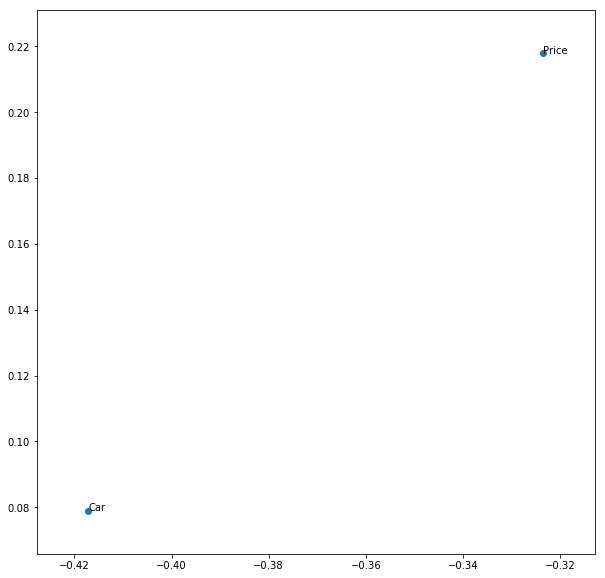

In [37]:
plot_words(x_test_list, ['Price','Car'], classes=None)

In [34]:
#plot_words(X_tsne, word_list, xlimits=[-5,10], ylimits=[-5,5])

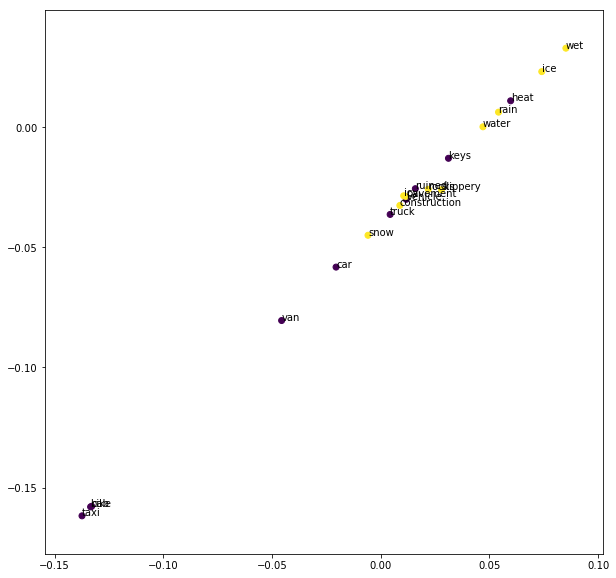

In [38]:
plot_words(X_tsne_target, targets, classes=classes)